In [1]:
import omicverse as ov
#import scvelo as scv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ov.ov_plot_set()


In [30]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

## cell size

In [100]:
import os
metric_li=[i for i in os.listdir('result') if 'cell.pkl' in i]
metric_li

['metric_hpc_cell.pkl', 'metric_dg_cell.pkl']

In [101]:
import pickle
metric_dict={}
for i in metric_li:
    with open(f'result/{i}','rb') as f:
        metric_dict[i.split('.')[0]]=pickle.load(f)

In [102]:
plot_data=pd.DataFrame(columns=['dataset','model','Cor_mean','non_Cor_mean',
                               'Cos_mean','non_Cos_mean','Trans_raw','Trans_after',
                               'Var_raw','Var_after','noisy','Inter_cells'])
for i in metric_dict.keys():
    for j in metric_dict[i].keys():
        test_li=[i.split('_')[-2],j]+list(metric_dict[i][j].values())
        plot_data.loc[str(i)+'-'+str(j)]=test_li

In [103]:
plot_data['Trans_dif']=plot_data['Trans_after'].values-plot_data['Trans_raw'].values
plot_data['Var_dif']=plot_data['Var_after'].values-plot_data['Var_raw'].values

In [104]:
plot_data['Cor_unique']=plot_data['Cor_mean'].values-plot_data['non_Cor_mean'].values
plot_data['Cos_unique']=plot_data['Cos_mean'].values-plot_data['non_Cos_mean'].values

In [105]:
plot_data['dataset_full']=plot_data['dataset'].map(
    {'dg':'Dentategyrus','hpc':'Hematopoietic'}
)

In [106]:
plot_data

,dataset,model,Cor_mean,non_Cor_mean,Cos_mean,non_Cos_mean,Trans_raw,Trans_after,Var_raw,Var_after,noisy,Inter_cells,Trans_dif,Var_dif,Cor_unique,Cos_unique,dataset_full
metric_hpc_cell-1000,hpc,1000,0.953148,0.624671,0.362940,0.038173,0,0.014868,0.000353,0.062044,18,784,0.014868,0.061691,0.328477,0.324767,Hematopoietic
metric_hpc_cell-2000,hpc,2000,0.954833,0.578063,0.425209,0.042525,0,0.015930,0.000353,0.063351,26,784,0.015930,0.062998,0.376769,0.382685,Hematopoietic
metric_hpc_cell-5000,hpc,5000,0.983790,0.554874,0.525947,0.046353,0,0.019735,0.000353,0.034537,41,641,0.019735,0.034184,0.428916,0.479594,Hematopoietic
metric_hpc_cell-10000,hpc,10000,0.993506,0.475332,0.587532,0.046398,0,0.000000,0.000353,0.013302,62,550,0.000000,0.012949,0.518174,0.541134,Hematopoietic
metric_hpc_cell-20000,hpc,20000,0.996557,0.471008,0.617970,0.046891,0,0.016031,0.000353,0.086319,39,712,0.016031,0.085966,0.525549,0.571080,Hematopoietic
metric_dg_cell-1000,dg,1000,0.882065,0.320870,0.293635,0.030905,0,0.000000,0.000524,0.001707,27,91,0.000000,0.001183,0.561195,0.262730,Dentategyrus
metric_dg_cell-2000,dg,2000,0.955197,0.331714,0.443954,0.034564,0,0.019383,0.000524,0.101010,34,94,0.019383,0.100486,0.623483,0.409390,Dentategyrus
metric_dg_cell-5000,dg,5000,0.993609,0.287323,0.548843,0.039390,0,0.023046,0.000524,0.000136,19,106,0.023046,-0.000388,0.706286,0.509453,Dentategyrus


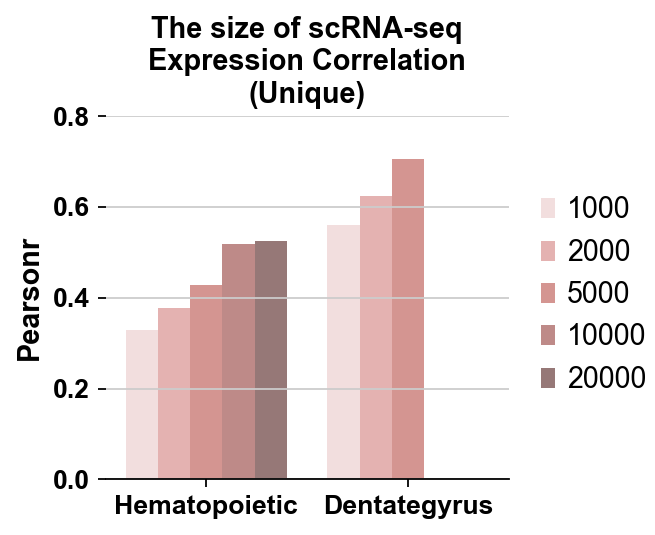

In [107]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cor_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.red_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Pearsonr",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('The size of scRNA-seq\nExpression Correlation\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cor_sc-size.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cor_sc-size.pdf',dpi=300,bbox_inches='tight')


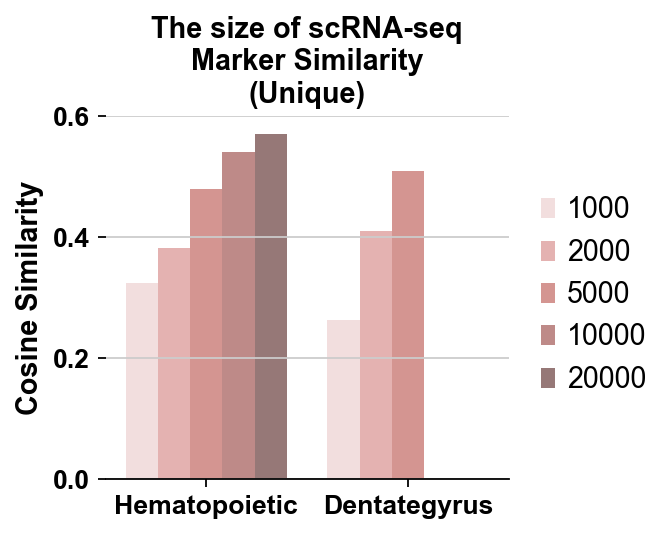

In [108]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cos_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.red_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Cosine Similarity",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('The size of scRNA-seq\nMarker Similarity\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cos_sc-size.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cos_sc-size.pdf',dpi=300,bbox_inches='tight')


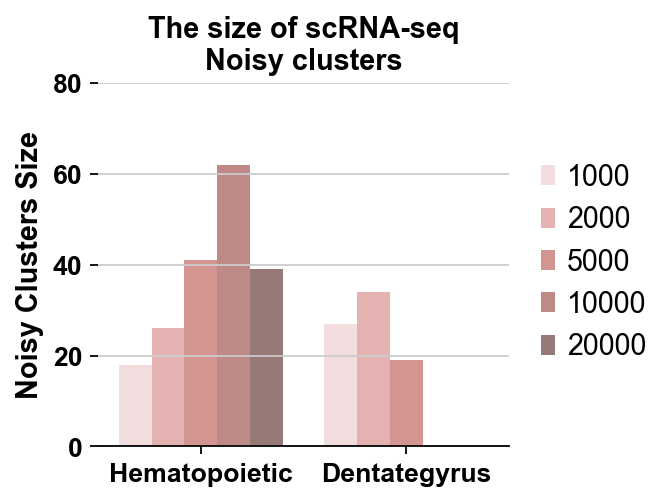

In [109]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="noisy", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.red_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Noisy Clusters Size",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('The size of scRNA-seq\nNoisy clusters',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_noisy_sc-size.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_noisy_sc-size.pdf',dpi=300,bbox_inches='tight')


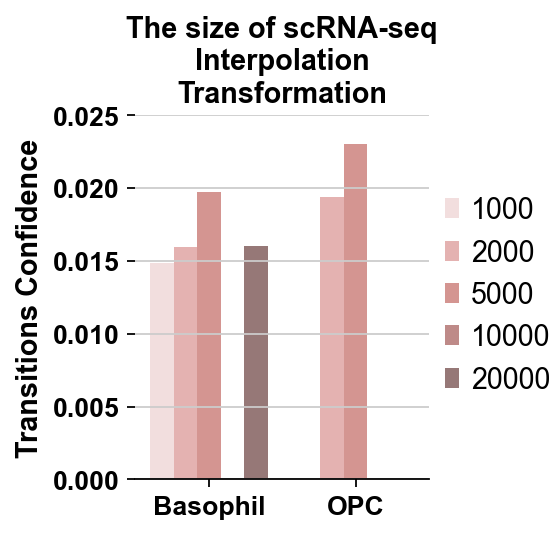

In [110]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Trans_dif", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.red_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Transitions Confidence",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['Basophil','OPC'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('The size of scRNA-seq\nInterpolation\nTransformation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_trans_sc-size.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_trans_sc-size.pdf',dpi=300,bbox_inches='tight')


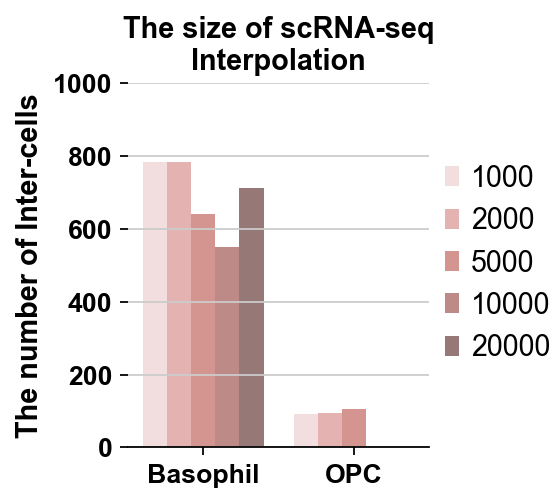

In [111]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Inter_cells", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.red_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "The number of Inter-cells",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['Basophil','OPC'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('The size of scRNA-seq\nInterpolation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_ic_sc-size.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_ic_sc-size.pdf',dpi=300,bbox_inches='tight')


## Scale size

In [112]:
import os
metric_li=[i for i in os.listdir('result') if 'cell_' in i]
metric_li

['metric_dg_cell_scale.pkl', 'metric_hpc_cell_scale.pkl']

In [113]:
import pickle
metric_dict={}
for i in metric_li:
    with open(f'result/{i}','rb') as f:
        metric_dict[i.split('.')[0]]=pickle.load(f)

In [114]:
plot_data=pd.DataFrame(columns=['dataset','model','Cor_mean','non_Cor_mean',
                               'Cos_mean','non_Cos_mean','Trans_raw','Trans_after',
                               'Var_raw','Var_after','noisy','Inter_cells'])
for i in metric_dict.keys():
    for j in metric_dict[i].keys():
        test_li=[i.split('_')[-3],j]+list(metric_dict[i][j].values())
        plot_data.loc[str(i)+'-'+str(j)]=test_li

In [115]:
plot_data['Trans_dif']=plot_data['Trans_after'].values-plot_data['Trans_raw'].values
plot_data['Var_dif']=plot_data['Var_after'].values-plot_data['Var_raw'].values

In [116]:
plot_data['Cor_unique']=plot_data['Cor_mean'].values-plot_data['non_Cor_mean'].values
plot_data['Cos_unique']=plot_data['Cos_mean'].values-plot_data['non_Cos_mean'].values

In [117]:
plot_data['dataset_full']=plot_data['dataset'].map(
    {'dg':'Dentategyrus','hpc':'Hematopoietic'}
)

In [118]:
plot_data

,dataset,model,Cor_mean,non_Cor_mean,Cos_mean,non_Cos_mean,Trans_raw,Trans_after,Var_raw,Var_after,noisy,Inter_cells,Trans_dif,Var_dif,Cor_unique,Cos_unique,dataset_full
metric_dg_cell_scale-1,dg,1,0.991141,0.247988,0.556061,0.038165,0,0.017826,0.000524,0.001173,1,53,0.017826,0.000649,0.743153,0.517896,Dentategyrus
metric_dg_cell_scale-2,dg,2,0.986118,0.238093,0.520849,0.036509,0,0.012129,0.000524,0.002307,17,106,0.012129,0.001783,0.748025,0.484340,Dentategyrus
metric_dg_cell_scale-4,dg,4,0.993960,0.212104,0.515252,0.037088,0,0.000000,0.000524,0.058464,72,212,0.000000,0.057940,0.781856,0.478164,Dentategyrus
metric_dg_cell_scale-6,dg,6,0.964988,0.302982,0.484663,0.039640,0,0.023109,0.000524,0.007461,162,0,0.023109,0.006938,0.662005,0.445022,Dentategyrus
metric_dg_cell_scale-8,dg,8,0.962592,0.344744,0.466051,0.028750,0,0.023109,0.000524,0.007461,266,0,0.023109,0.006938,0.617848,0.437302,Dentategyrus
metric_dg_cell_scale-10,dg,10,0.964934,0.292920,0.482357,0.033685,0,0.023109,0.000524,0.007461,336,0,0.023109,0.006938,0.672014,0.448672,Dentategyrus
metric_hpc_cell_scale-1,hpc,1,0.992801,0.415896,0.459931,0.040868,0,0.010508,0.000353,0.011806,1,63,0.010508,0.011453,0.576905,0.419062,Hematopoietic
metric_hpc_cell_scale-2,hpc,2,0.994122,0.467403,0.472380,0.041679,0,0.000000,0.000353,0.009516,0,126,0.000000,0.009163,0.526720,0.430701,Hematopoietic
metric_hpc_cell_scale-4,hpc,4,0.993809,0.457815,0.452121,0.041665,0,0.015025,0.000353,0.015055,6,252,0.015025,0.014702,0.535994,0.410456,Hematopoietic
metric_hpc_cell_scale-6,hpc,6,0.994657,0.473551,0.473141,0.044046,0,0.000000,0.000353,0.005809,23,324,0.000000,0.005456,0.521105,0.429095,Hematopoietic


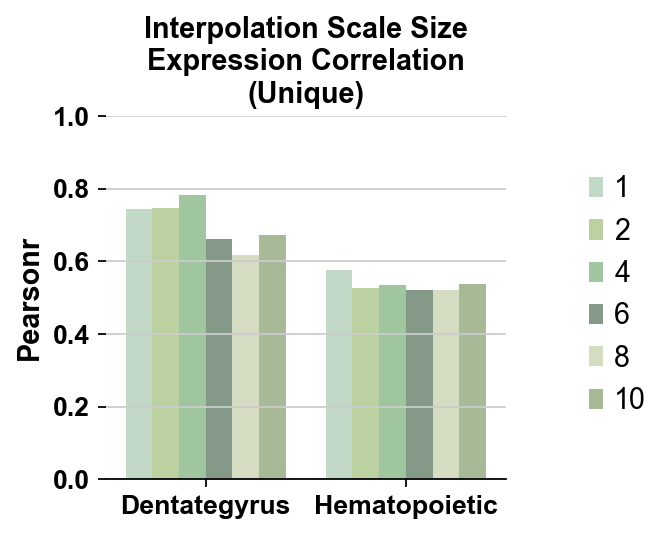

In [120]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cor_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.green_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Pearsonr",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Interpolation Scale Size\nExpression Correlation\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cor_scale.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cor_scale.pdf',dpi=300,bbox_inches='tight')


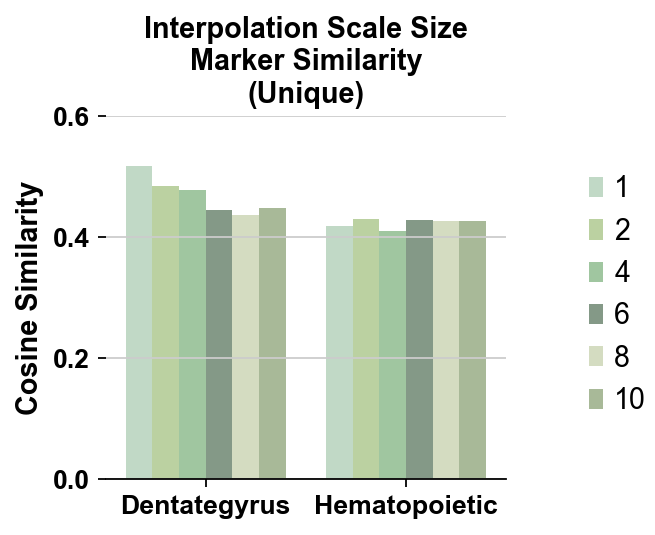

In [121]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cos_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.green_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Cosine Similarity",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Interpolation Scale Size\nMarker Similarity\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cos_scale.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cos_scale.pdf',dpi=300,bbox_inches='tight')


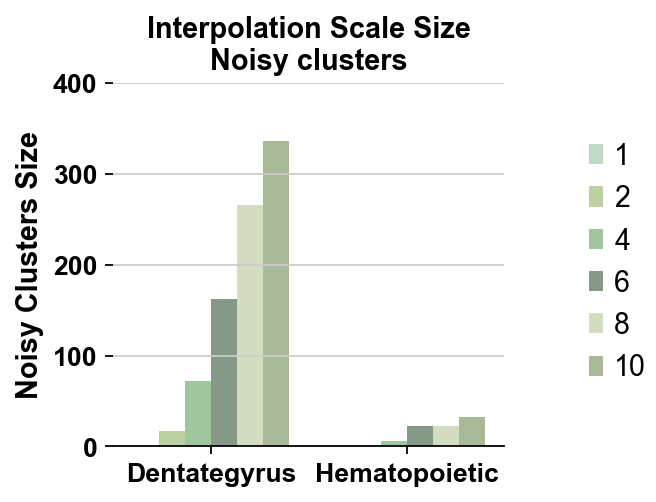

In [122]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="noisy", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.green_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Noisy Clusters Size",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Interpolation Scale Size\nNoisy clusters',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_noisy_scale.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_noisy_scale.pdf',dpi=300,bbox_inches='tight')


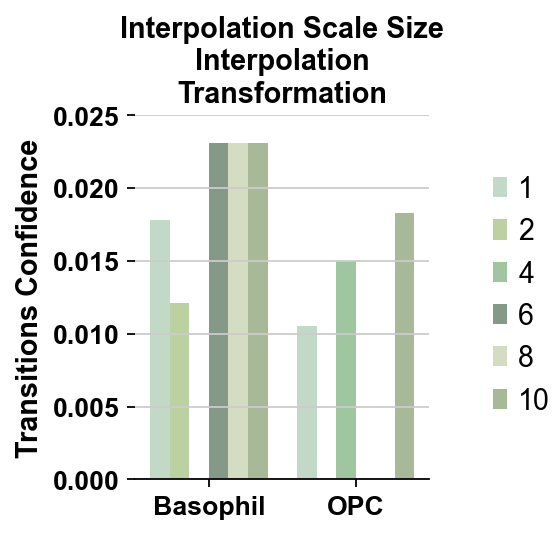

In [123]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Trans_dif", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.green_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Transitions Confidence",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['Basophil','OPC'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('Interpolation Scale Size\nInterpolation\nTransformation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_trans_scale.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_trans_scale.pdf',dpi=300,bbox_inches='tight')


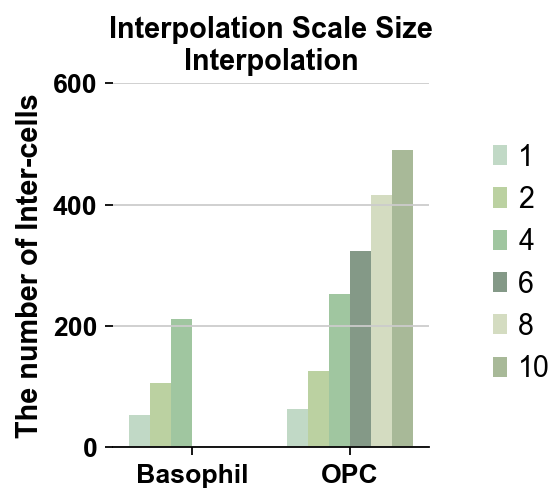

In [124]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Inter_cells", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.green_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "The number of Inter-cells",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['Basophil','OPC'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('Interpolation Scale Size\nInterpolation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_ic_scale.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_ic_scale.pdf',dpi=300,bbox_inches='tight')


## hidden size

In [125]:
import os
metric_li=[i for i in os.listdir('result') if 'hidden' in i]
metric_li

['metric_dg_hidden.pkl', 'metric_hpc_hidden.pkl']

In [126]:
import pickle
metric_dict={}
for i in metric_li:
    with open(f'result/{i}','rb') as f:
        metric_dict[i.split('.')[0]]=pickle.load(f)

In [127]:
plot_data=pd.DataFrame(columns=['dataset','model','Cor_mean','non_Cor_mean',
                               'Cos_mean','non_Cos_mean','Trans_raw','Trans_after',
                               'Var_raw','Var_after','noisy','Inter_cells'])
for i in metric_dict.keys():
    for j in metric_dict[i].keys():
        test_li=[i.split('_')[-2],j]+list(metric_dict[i][j].values())
        plot_data.loc[str(i)+'-'+str(j)]=test_li

In [128]:
plot_data['Trans_dif']=plot_data['Trans_after'].values-plot_data['Trans_raw'].values
plot_data['Var_dif']=plot_data['Var_after'].values-plot_data['Var_raw'].values

In [129]:
plot_data['Cor_unique']=plot_data['Cor_mean'].values-plot_data['non_Cor_mean'].values
plot_data['Cos_unique']=plot_data['Cos_mean'].values-plot_data['non_Cos_mean'].values

In [130]:
plot_data['dataset_full']=plot_data['dataset'].map(
    {'dg':'Dentategyrus','hpc':'Hematopoietic'}
)

In [131]:
plot_data

,dataset,model,Cor_mean,non_Cor_mean,Cos_mean,non_Cos_mean,Trans_raw,Trans_after,Var_raw,Var_after,noisy,Inter_cells,Trans_dif,Var_dif,Cor_unique,Cos_unique,dataset_full
metric_dg_hidden-64,dg,64,0.992447,0.259584,0.555072,0.039374,0,0.031360,0.000524,0.000104,14,84,0.031360,-0.000420,0.732863,0.515698,Dentategyrus
metric_dg_hidden-128,dg,128,0.991807,0.281389,0.544913,0.038932,0,0.000000,0.000524,0.003984,17,106,0.000000,0.003460,0.710418,0.505981,Dentategyrus
metric_dg_hidden-256,dg,256,0.988232,0.287221,0.548476,0.038911,0,0.022114,0.000524,0.001214,21,90,0.022114,0.000690,0.701011,0.509565,Dentategyrus
metric_dg_hidden-512,dg,512,0.992349,0.272541,0.552497,0.039007,0,0.029417,0.000524,0.001403,22,90,0.029417,0.000880,0.719808,0.513490,Dentategyrus
metric_dg_hidden-1024,dg,1024,0.991660,0.276692,0.540695,0.039201,0,0.028747,0.000524,0.000016,17,84,0.028747,-0.000507,0.714969,0.501494,Dentategyrus
metric_hpc_hidden-64,hpc,64,0.993006,0.483260,0.525996,0.046454,0,0.000000,0.000353,0.013150,0,126,0.000000,0.012797,0.509747,0.479542,Hematopoietic
metric_hpc_hidden-128,hpc,128,0.993926,0.457483,0.527889,0.045535,0,0.000000,0.000353,0.004588,0,126,0.000000,0.004235,0.536443,0.482354,Hematopoietic
metric_hpc_hidden-256,hpc,256,0.991681,0.481413,0.506855,0.044611,0,0.017437,0.000353,0.009904,0,126,0.017437,0.009551,0.510269,0.462244,Hematopoietic
metric_hpc_hidden-512,hpc,512,0.994028,0.454335,0.532685,0.046464,0,0.000000,0.000353,0.008248,1,108,0.000000,0.007895,0.539693,0.486222,Hematopoietic
metric_hpc_hidden-1024,hpc,1024,0.993393,0.482132,0.522975,0.045669,0,0.014599,0.000353,0.014261,0,126,0.014599,0.013908,0.511261,0.477307,Hematopoietic


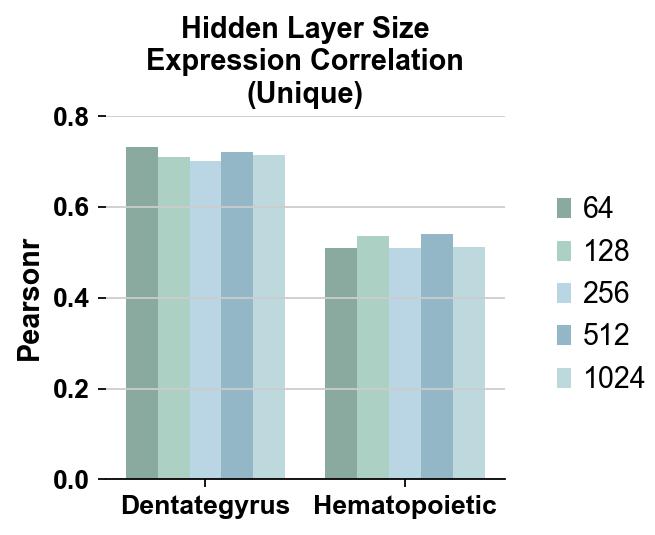

In [132]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cor_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.blue_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Pearsonr",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Hidden Layer Size\nExpression Correlation\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cor_hidden.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cor_hidden.pdf',dpi=300,bbox_inches='tight')


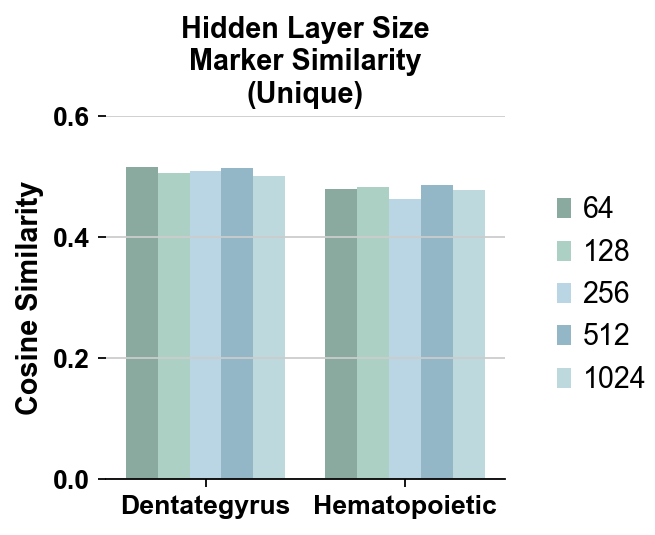

In [133]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cos_unique", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.blue_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Cosine Similarity",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Hidden Layer Size\nMarker Similarity\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_cos_hidden.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_cos_hidden.pdf',dpi=300,bbox_inches='tight')


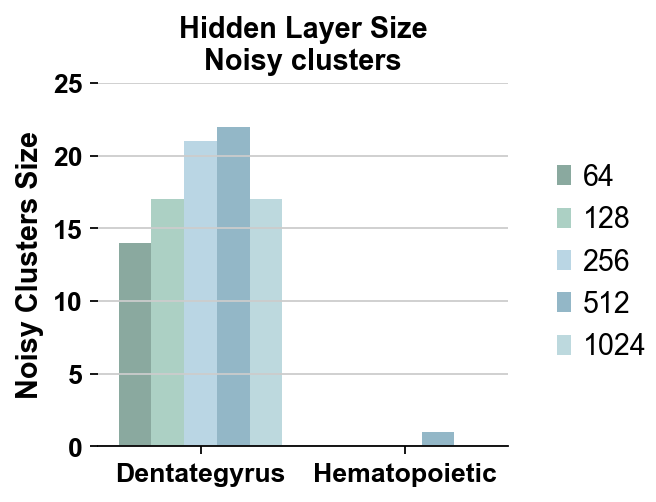

In [134]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="noisy", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.blue_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Noisy Clusters Size",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.title('Hidden Layer Size\nNoisy clusters',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_noisy_hidden.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_noisy_hidden.pdf',dpi=300,bbox_inches='tight')


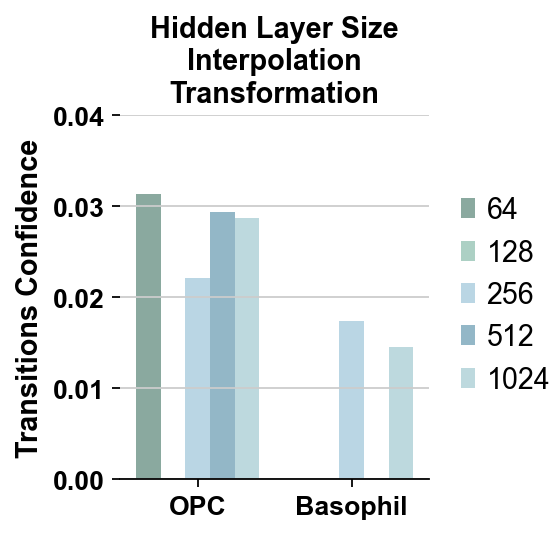

In [135]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Trans_dif", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.blue_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Transitions Confidence",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['OPC','Basophil'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('Hidden Layer Size\nInterpolation\nTransformation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_trans_hidden.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_trans_hidden.pdf',dpi=300,bbox_inches='tight')


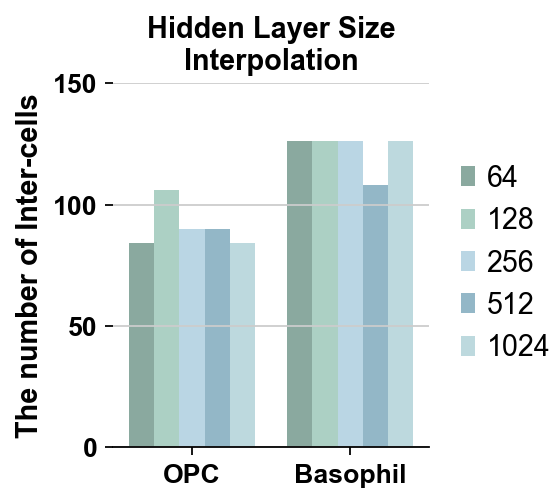

In [136]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Inter_cells", hue="model",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.blue_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "The number of Inter-cells",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['OPC','Basophil'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('Hidden Layer Size\nInterpolation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_ic_hidden.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_ic_hidden.pdf',dpi=300,bbox_inches='tight')


## Calculate time

In [141]:
hpc_time={
    '1000':'04:56',
    '2000':'16:57',
    '5000':'41:18+02:33',
    '10000':'39:38+16:53',
    '20000':'70:51+43:09',
}

dg_time={
    '1000':'09:12',
    '2000':'18:24',
    '5000':'22:54+04:57',
}

def time_to_minutes(time_str):
    parts = time_str.split('+')
    total_minutes = 0
    for part in parts:
        time_parts = part.split(':')
        if len(time_parts) == 2:
            hours, minutes = map(int, time_parts)
            total_minutes += hours * 60 + minutes
        elif len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_minutes += hours * 60 + minutes + seconds / 60
    return total_minutes

result1 = {}
for key, value in hpc_time.items():
    result1[key] = time_to_minutes(value)

result2 = {}
for key, value in dg_time.items():
    result2[key] = time_to_minutes(value)


In [143]:
result2

{'1000': 552, '2000': 1104, '5000': 1671}

In [149]:
plot_data1=pd.DataFrame(columns=['model','cellsize','time'])
for key, value in result1.items():
    plot_data1.loc['hpc'+key]=['hpc',key,value]
for key, value in result2.items():
    plot_data1.loc['dg'+key]=['dg',key,value]
plot_data1['dataset_full']=plot_data1['model'].map(
    {'dg':'Dentategyrus','hpc':'Hematopoietic'}
)

In [150]:
plot_data1

,model,cellsize,time,dataset_full
hpc1000,hpc,1000,296,Hematopoietic
hpc2000,hpc,2000,1017,Hematopoietic
hpc5000,hpc,5000,2631,Hematopoietic
hpc10000,hpc,10000,3391,Hematopoietic
hpc20000,hpc,20000,6840,Hematopoietic
dg1000,dg,1000,552,Dentategyrus
dg2000,dg,2000,1104,Dentategyrus
dg5000,dg,5000,1671,Dentategyrus


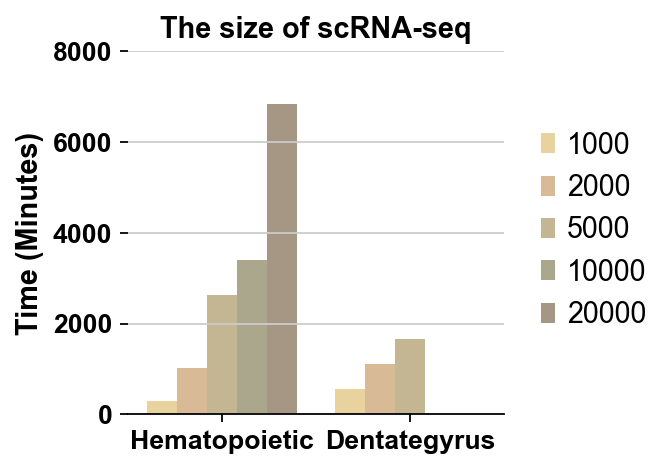

In [155]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data1, kind="bar",
    x="dataset_full", y="time", hue="cellsize",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=ov.utils.orange_color[:]
    
)
g.despine(left=True)
g.set_axis_labels("", "Time (Minutes)",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.2,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
#plt.ylim(-0.01,0.05)
plt.title('The size of scRNA-seq',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/arg_bar_caltime.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/arg_bar_caltime.pdf',dpi=300,bbox_inches='tight')
